In [4]:
import pandas as pd
df = pd.read_csv("C:/data_science/messy_data.csv")
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [21]:
#Average income by gender
df2 = df.groupby('Gender')
df2['Income'].mean()
#Averger income by product
df3 = df.groupby('Product')
df3['Income'].mean()
#count number of people
df3['Age'].aggregate('count')
#find min max mean median
df['Income'].aggregate(['min','max','mean','median'])
#same info but gender
df.groupby('Gender')['Income'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,54.0,49644.486259,15220.366090,27763.63630,37549.629215,47443.734975,59180.209903,94154.95125
Male,40.0,57219.421148,42222.682325,20901.33172,38144.018710,52807.321410,63330.314347,300000.00000


,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
99,61,300000.00000,Male,B,4
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2


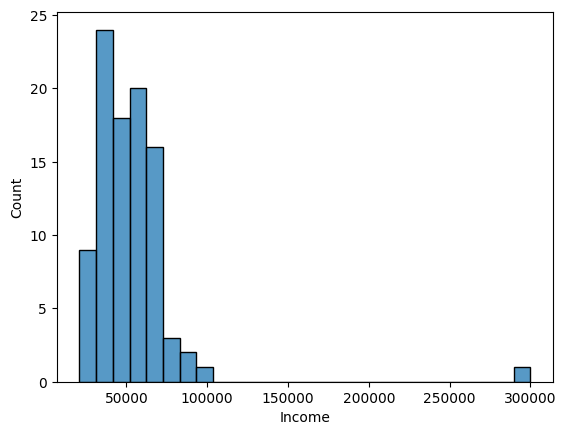

In [30]:
import matplotlib.pyplot 
import seaborn as sns

sns.histplot(df['Income'])
df[df['Income']>25000]

<Axes: >

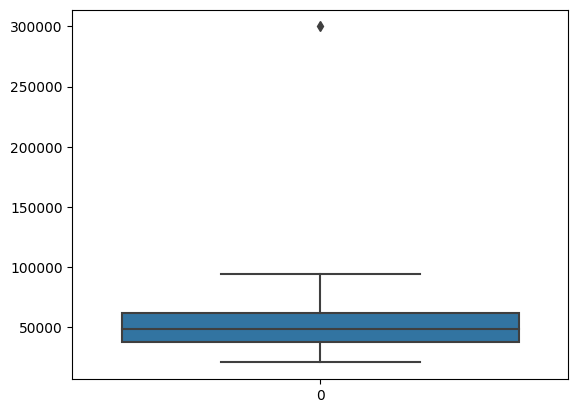

In [37]:
df2 = df.set_index('Income').drop(300000)
#sns.histplot(df2.reset_index()['Income'])
#sns.scatterplot(df2.reset_index())
sns.boxplot(df['Income'])

<Axes: xlabel='Product', ylabel='Income'>

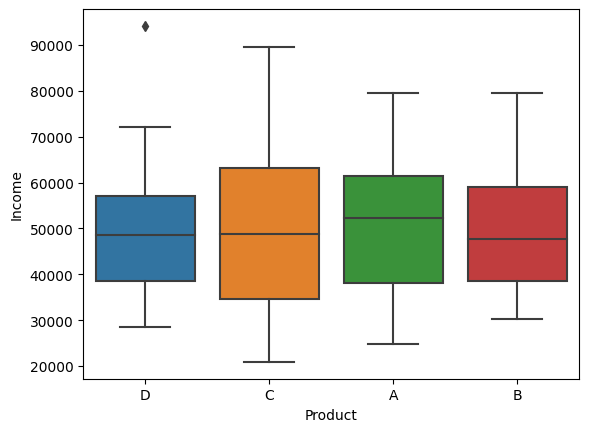

In [42]:
sns.boxplot(df2.reset_index(),x= 'Product', y = 'Income')

In [ ]:
df2.reset_index(inplace=True)


In [64]:
#df2.drop_duplicates(inplace=True)
#df2.info()
#filling missing data
#df2.groupby('Gender')['Income'].median()
male_clean=df2[df2['Gender']=='Male'].fillna(50656.55325)
female_clean=df2[df2['Gender']=='Female'].fillna(48320.18269)
df_clean = pd.concat([male_clean, female_clean], axis = 0)
df2['Income']=df2['Income'].fillna(df2.groupby('Gender')['Income'].transform('median'))
df2['Product'] = df2['Product'].fillna('Unknow')
df2.dropna(subset='Product',inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   level_0   104 non-null    int64  
 1   index     104 non-null    int64  
 2   Income    104 non-null    float64
 3   Age       104 non-null    int64  
 4   Gender    104 non-null    object 
 5   Product   104 non-null    object 
 6   Quantity  104 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.8+ KB
